# Modelling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.integrate import solve_ivp


def integrate(model, y0, parameters, t_end, n_points=100):
    sol = solve_ivp(
        lambda t, y, *args: model(*y, *args),
        args=parameters,
        y0=list(y0.values()),
        t_span=(0, t_end),
        t_eval=np.linspace(0, t_end, n_points),
        method="LSODA",
    )
    return pd.DataFrame(sol.y.T, index=sol.t, columns=y0.keys())

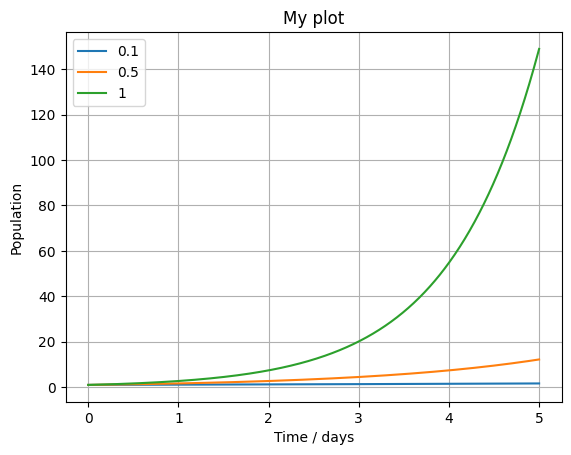

In [30]:
fig,ax=plt.subplots()
def exponential_growth(N, k):
    return k * N
for r in [0.1,0.5,1]:
    df = integrate(
        exponential_growth,
        y0={"N": 1.0},
        parameters=(r,),
        t_end=5,
        n_points=1000
    )
    ax.plot(df,label=r)
ax.set_xlabel("Time / days")
ax.set_ylabel("Population")
ax.set_title("My plot")
ax.grid(True)
ax.legend()


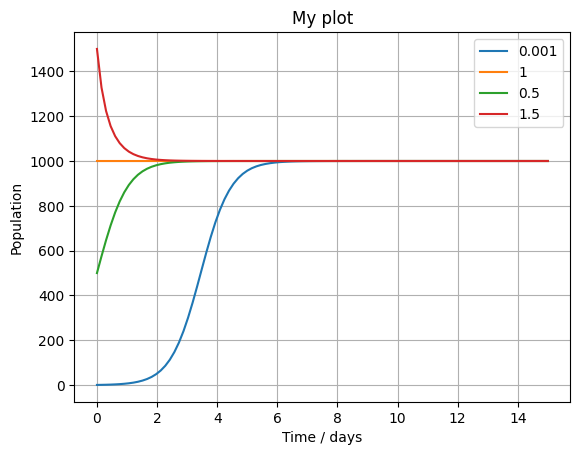

In [78]:
fig,ax=plt.subplots()
def logistic_growth(N,r,K):
    '''
    N: population size
    r: growth rate
    k: carrying capacity
    '''
    return r*N*(1-(N/K))

K=1000
for c in [1/K,1,0.5,3/2]:
    df=integrate(
        logistic_growth,
        y0={"population":c*K},
        parameters=(2,K),
        t_end=15
    )
    ax.plot(df,label=c)
    ax.legend()
ax.set_xlabel("Time / days")
ax.set_ylabel("Population")
ax.set_title("My plot")
ax.grid(True)    

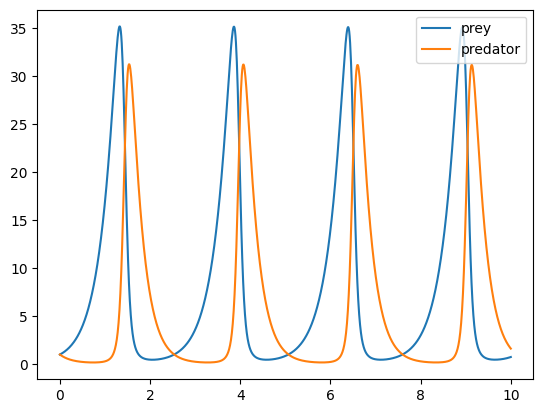

In [86]:
def lotka_volterra(X,Y,r,a,b,c,d,e):
    """
    X: prey
    Y: predator
    r: 1
    a: 0.5
    b: 0.5
    c: 1
    d:3
    e:1
    """
    return ((r*X)+(e*X)-(a*X*Y), (b*X*Y)-(c*Y)-(d*Y))
df=integrate(
    lotka_volterra,
    y0={"prey":1,"predator":1},
    parameters=(2,0.5,0.5,1,3,1),
    t_end=10,
    n_points=1000
).plot()

# SIR

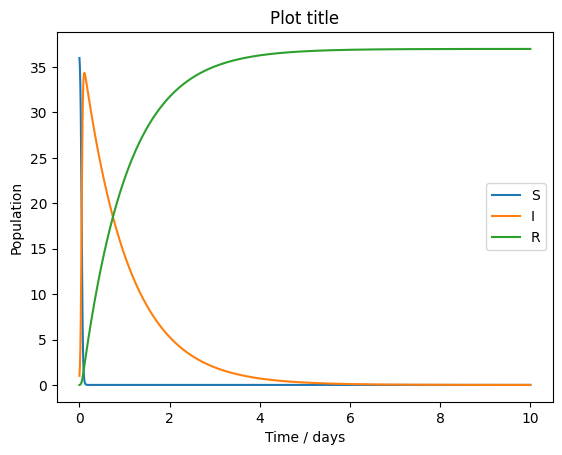

In [90]:
def sir(S,I,R,a,b):
    """
    a:
    b:
    
    """
    return (-a*S*I,a*S*I-b*I,b*I)
df=integrate(
    sir,
    y0={"S":36,"I":1,"R":0},
    parameters=(2,1),
    t_end=10,
    n_points=1000
).plot(xlabel="Time / days",ylabel="Population",title="Plot title")

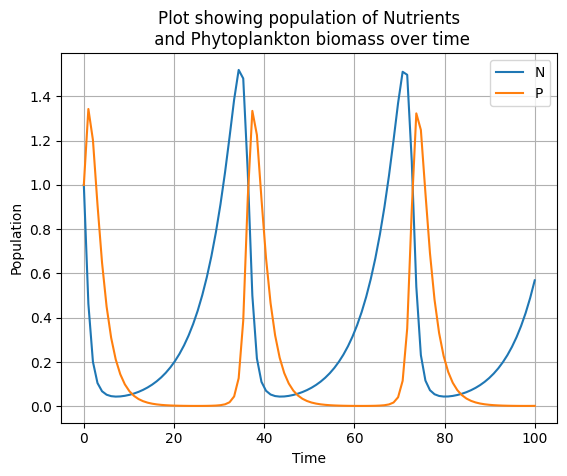

In [52]:
def cha2b(N,P,a,b,c,d,e):
    return (a*N-b*N*P-e*N,c*N*P-d*P)
df=integrate(
    cha2b,
    y0={"N":1,"P":1},
    parameters=(0.15,0.75,1,0.42,0),
    t_end=100,
    n_points=100
)
df.plot(xlabel="Time",ylabel="Population",title="Plot showing population of Nutrients\n and Phytoplankton biomass over time")
plt.grid()
plt.savefig()

In [36]:
import matplotlib.pyplot as plt